In [1]:
from mdgo.core import MdRun
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from MDAnalysis.analysis.distances import distance_array
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter

In [2]:

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [23]:
mn_6_run = MdRun("/Users/th/Downloads/mof_project/onefold_6_pro/onefold_6_pro.data",
                 "/Users/th/Downloads/mof_project/onefold_6_pro/onefold_npt_nvt.dcd",
                 "/Users/th/Downloads/mof_project/onefold_6_pro/onefold_npt_unwrapped_nvt.dcd",
                 500, 10, "mof onefold mn 6", 
                 {"cation": "type 10", "anion": "same charge as index 6", "PC": "type 12", "center": "type 7"},
                 anion_charge = -1/4)
mn_55_run = MdRun("/Users/th/Downloads/mof_project/onefold_55_pro/onefold_55_pro.data",
                  "/Users/th/Downloads/mof_project/onefold_55_pro/onefold_55_nvt.dcd",
                  "/Users/th/Downloads/mof_project/onefold_55_pro/onefold_55_unwrapped_nvt.dcd",
                  500, 10, "mof onefold mn 55", 
                 {"cation": "type 10", "anion": "same charge as index 6", "PC": "type 12", "center": "type 7"},
                 anion_charge = -1/4)

/Users/th/Documents/mdgo/mdgo/core.py:93: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


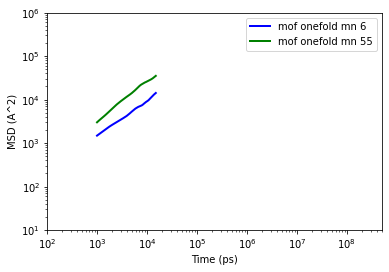

In [71]:
# start and end of fitting region selection (linear regime)
start = int(1000/10)
end = int(15000/10)
mn_6_run.plot_cond_array(start, end, mn_55_run)

In [72]:
mn_6_run.get_conductivity(start, end)

Conductivity of mof onefold mn 6: 1.5823353711345831 ± 0.00284430270557407 mS/cm


In [73]:
mn_55_run.get_conductivity(start, end)

Conductivity of mof onefold mn 55: 3.998218021173865 ± 0.013873609886039478 mS/cm


In [26]:
run_start = int(10000/10)
run_end = int(50000/10)
cna_mn_6_o = mn_6_run.coordination_one_species('anion', 3.2, run_start, run_end)
cna_mn_6_pc = mn_6_run.coordination_one_species('PC', 3.2, run_start, run_end)
cna_mn_55_o = mn_55_run.coordination_one_species('anion', 3.4, run_start, run_end)
cna_mn_55_pc = mn_55_run.coordination_one_species('PC', 3.4, run_start, run_end)

In [7]:
cna_mn_6_o

,Num of anion within 3.2 Å,Percentage
0,0,67.7562%
1,1,10.7875%
2,2,21.4406%
3,3,0.0156%


In [8]:
cna_mn_6_pc

,Num of PC within 3.2 Å,Percentage
0,0,0.0010%
1,1,0.3063%
2,2,6.2906%
3,3,27.5292%
4,4,35.7635%
5,5,28.6573%
6,6,1.4427%
7,7,0.0094%


In [9]:
cna_mn_55_o

,Num of anion within 3.4 Å,Percentage
0,0,76.5229%
1,1,7.9312%
2,2,15.4479%
3,3,0.0979%


In [10]:
cna_mn_55_pc

,Num of PC within 3.4 Å,Percentage
0,0,0.0031%
1,1,0.2104%
2,2,5.4448%
3,3,24.5781%
4,4,42.7729%
5,5,25.5854%
6,6,1.4000%
7,7,0.0052%


In [8]:
run_start = int(10000/10)
run_end = int(50000/10)
mn_6_msd_all = mn_6_run.get_msd_all(run_start, run_end)
mn_55_msd_all = mn_55_run.get_msd_all(run_start, run_end)

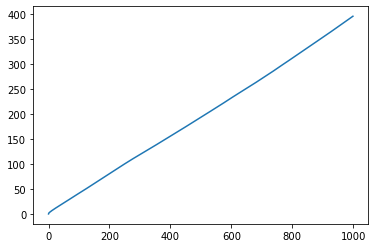

In [15]:
plt.plot(mn_6_msd_all[:1000])

In [76]:
mn_6_run.get_d(mn_6_msd_all, 0, 1000)

Diffusivity of all Li: 6.600623013779935e-11 m^2/s
Conductivity of all Li: 1.740030937518919 mS/cm


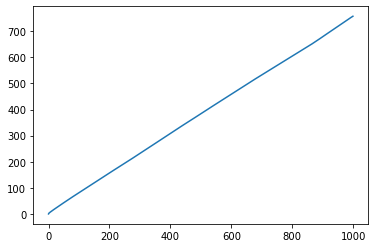

In [77]:
plt.plot(mn_55_msd_all[:1000])

In [14]:
mn_55_run.get_d(mn_55_msd_all, 0, 1000)

Diffusivity of all Li: 1.2641841798344622e-10 m^2/s
Conductivity of all Li: 3.2825338362500665 mS/cm


In [24]:
freq_mn_6, hop_distance_mn_6 = mn_6_run.get_hopping_freq_dist(1000, 5000, "center", 8.0, 8.0, smooth=51)
D_mn_6 = freq_mn_6*1e12*hop_distance_mn_6**2*1e-20/6
print(freq_mn_6, hop_distance_mn_6)
print(D_mn_6, "m/s2")
freq_mn_55, hop_distance_mn_55 = mn_55_run.get_hopping_freq_dist(1000, 5000, "center", 8.0, 8.0, smooth=51)
D_mn_55 = freq_mn_55*1e12*hop_distance_mn_55**2*1e-20/6
print(freq_mn_55, hop_distance_mn_55)
print(D_mn_55, "m/s2")


0.00016874999999999998 9.96249272106726
2.791441721737072e-11 m/s2



0.0002708333333333334 11.084489099895196
5.546030145395974e-11 m/s2


In [21]:
run_start = int(10000/10)
run_end = int(50000/10)
mn_6_msd_free, mn_6_msd_attach = mn_6_run.get_msd_partial(3.2, run_start, run_end, largest=1000)


In [22]:
mn_55_msd_free, mn_55_msd_attach = mn_55_run.get_msd_partial(3.4, run_start, run_end, largest=1000)

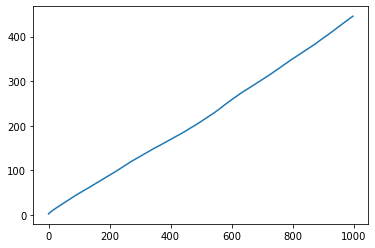

In [28]:
plt.plot(mn_6_msd_free)

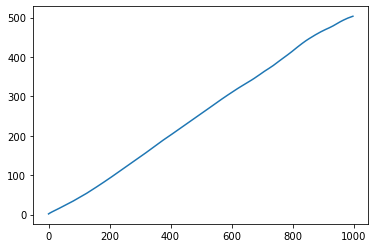

In [29]:
plt.plot(mn_6_msd_attach)

In [95]:
mn_6_run.get_d(mn_6_msd_free, 0, 400, percentage=float(cna_mn_6_o.iloc[0]['Percentage'][:-1])/100)

Diffusivity of 67.76% Li:  6.962957034508387e-11 m^2/s
Conductivity of 67.76% Li:  1.2436976032276812 mS/cm


In [96]:
mn_6_run.get_d(mn_6_msd_attach, 0, 400, percentage=1-float(cna_mn_6_o.iloc[0]['Percentage'][:-1])/100)

Diffusivity of 32.24% Li:  8.337404449780781e-11 m^2/s
Conductivity of 32.24% Li:  0.7086782910106749 mS/cm


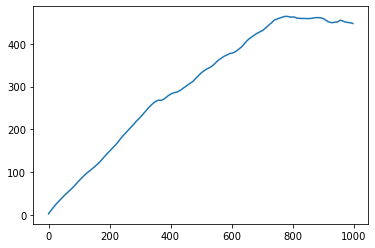

In [68]:
plt.plot(mn_55_msd_free)

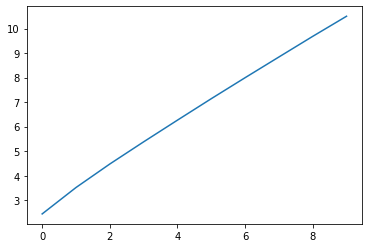

In [66]:
plt.plot(mn_55_msd_attach)

In [61]:
mn_55_run.get_d(mn_55_msd_free, 0, 300, percentage=0.7673)

Diffusivity of 76.73% Li:  1.250754153728485e-10 m^2/s
Conductivity of 76.73% Li:  2.491930997121197 mS/cm


In [62]:
mn_55_run.get_d(mn_55_msd_attach, 0, 300, percentage=1-0.7673)

Diffusivity of 23.27% Li:  1.3739562378989325e-10 m^2/s
Conductivity of 23.27% Li:  0.8301721190701085 mS/cm


In [ ]:
run_start = int(10000/10)
run_end = int(50000/10)
array = mn_6_run.get_neighbor_corr(["anion", "PC"], 3.2, run_start, run_end)

In [ ]:
mn_6_run.get_residence_time(["anion", "PC"], array[0], array[1], 1000)

In [71]:
def trajectory(nvt_run, li_atom, run_start, run_end, species, selection_dict, distance):
    A_values = {}
    time_count = 0
    group = li_atom
    trj_analysis = nvt_run.trajectory[run_start:run_end:]
    if species not in list(selection_dict):
        print('Invalid species selection')
        return None
    for ts in tqdm_notebook(nvt_run.trajectory[run_start::]):
        selection = "(" + selection_dict[species] + ") and (around " \
                    + str(distance) + " index " \
                    + str(li_atom.id - 1) + ")"
        shell = nvt_run.select_atoms(selection, periodic=True)
        for atom in shell.atoms:
            if str(atom.id) not in A_values:
                A_values[str(atom.id)] = np.full(int((nvt_run.trajectory.n_frames-run_start)/1), 100.)
        time_count += 1
    print(A_values.keys())
    time_count = 0
    for ts in tqdm_notebook(nvt_run.trajectory[run_start::]):
        for atomid in A_values.keys():
            dist = distance_array(ts[li_atom.id-1], ts[(int(atomid)-1)], ts.dimensions)
            #dist = MDAnalysis.analysis.distances.distance_array(g1.position, g2.position)[0][0]
            A_values[atomid][time_count] = dist
        time_count += 1
    return A_values

In [79]:
result = trajectory(mn_6_run.wrapped_run, mn_6_run.wrapped_run.select_atoms("type 10")[1], 
                    1000, 5000, "anion", mn_6_run.select_dict, 2.5)

/Users/th/anaconda/envs/mdanalysis/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':



dict_keys(['113', '115', '212', '199', '201', '126', '200', '28', '27', '114'])


/Users/th/anaconda/envs/mdanalysis/lib/python3.7/site-packages/ipykernel_launcher.py:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/Users/th/anaconda/envs/mdanalysis/lib/python3.7/site-packages/ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


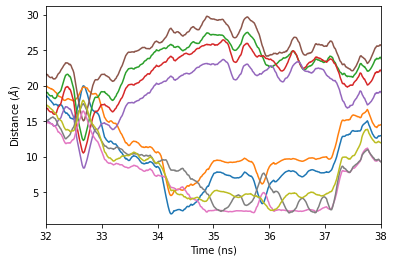

In [85]:
times = []
step = 0
timestep = 10000 # number of femtoseconds between data collection 
fs2ps = 1e-3
for ts in range(4501):  # omit first 10 ns
    times.append(step * timestep * fs2ps)
    step += 1
times = np.array(times)

#plot figure
i=0
for distance in tqdm_notebook(list(result.values())[:]):
    i+=1
    if i == 1:
        continue
    plt.plot(times/1000, savgol_filter(distance,31,2), label = "O" + str(i))
    #plt.plot(times/1000, savgol_filter(distance,31,2), label = i)
plt.xlabel('Time (ns)')
#plt.legend()
plt.ylabel(r'Distance ($\AA$)')
#plt.ylim(0,10)
plt.xlim(32,38)
plt.show()

In [78]:
for value in result.values():
    print(value.min())

2.159158103826846
1.9579383363093428
2.0117017734509477
2.9229145117261623
1.9553011973532204
1.9991990378053672
2.0804928075147004
2.189021570064392
2.1303318923903505
1.9538854652026567
2.0320324566112467
